In [1]:
import os
import sys

# add the parent dir of notebooks to path
sys.path.append(os.path.dirname(os.path.abspath('')))

# make an output dir
OUTPUT_DIRECTORY = os.path.join(os.path.abspath(''), "03_Contaminations_output")
os.makedirs(OUTPUT_DIRECTORY, exist_ok=True)

# Contaminations

In this notebook, we visualise the effects of the random contaminations added to evaluate the model's ability to generalise to noisy, poorly-labelled training data.


In [2]:
from data.nab.real_tweets import nab_multivariate_tweet_volume, STOCK_NAMES
from data.yahoo.a1_benchmark import yahoo_a1_benchmark

tweet_df = nab_multivariate_tweet_volume(labels="points")
yahoo_df = yahoo_a1_benchmark(clean_series=False)

In [3]:
from evaluation.utils import contaminate

In [4]:
import matplotlib.pyplot as plt

def extract_value_columns(df):
    return list(filter(lambda c: c.startswith("value_"), df.columns))

def get_anomaly_col_name_from_value_col_name(col_name):
    return col_name.replace("value_", "anomaly_")

def plot_dataframe_with_contaminations(df, contaminated_indices, title=None):
    plt.ion()
    value_cols = extract_value_columns(df)
    fig, axes = plt.subplots(len(value_cols), 1, figsize=(15, 5*(len(value_cols))), dpi=160)

    for i in range(len(value_cols)):
        col_name = value_cols[i]
        try:
            ax = axes[i]
        except:
            ax = axes
        ax.title.set_text(col_name)
        
        def color_map(row):
            if row[get_anomaly_col_name_from_value_col_name(col_name)] is True:
                return (1,0,0)
            elif row.name in contaminated_indices:
                return (0,0,1)
            else:
                return (0,1,0)
        
        ax.scatter(df.index, df[col_name], c=df.reset_index().apply(color_map, axis=1), s=1, marker=",")
        ax.fill_between(df.index, 0, 1, where=df[get_anomaly_col_name_from_value_col_name(col_name)], color="red", alpha=0.2, transform=ax.get_xaxis_transform())
        ax.fill_between(df.index, 0, 1, where=df.reset_index().index.isin(contaminated_indices), color="blue", alpha=0.2, transform=ax.get_xaxis_transform())
        ax.set_xticks([])
        ax.set_xlabel("Timestep", fontsize="medium")

    if title:
        fig.suptitle(title, fontsize="large")
    
    fig.tight_layout()
    plt.draw()


def plot_at_contamination(df, contamination_factor):
    contaminated_df, contaminated_indices = contaminate(
        df,
        contamination_factor=contamination_factor,
        return_contaminated_indices=True
    )
    plot_dataframe_with_contaminations(contaminated_df, contaminated_indices, title=f"{contamination_factor*100}% contamination")


In [5]:
def extract_series(df, series_name):
    new_view = df[[series_name, get_anomaly_col_name_from_value_col_name(series_name)]]
    return new_view

goog_tweets = extract_series(tweet_df, "value_GOOG")

## Varying contaminations of NAB Tweets GOOG


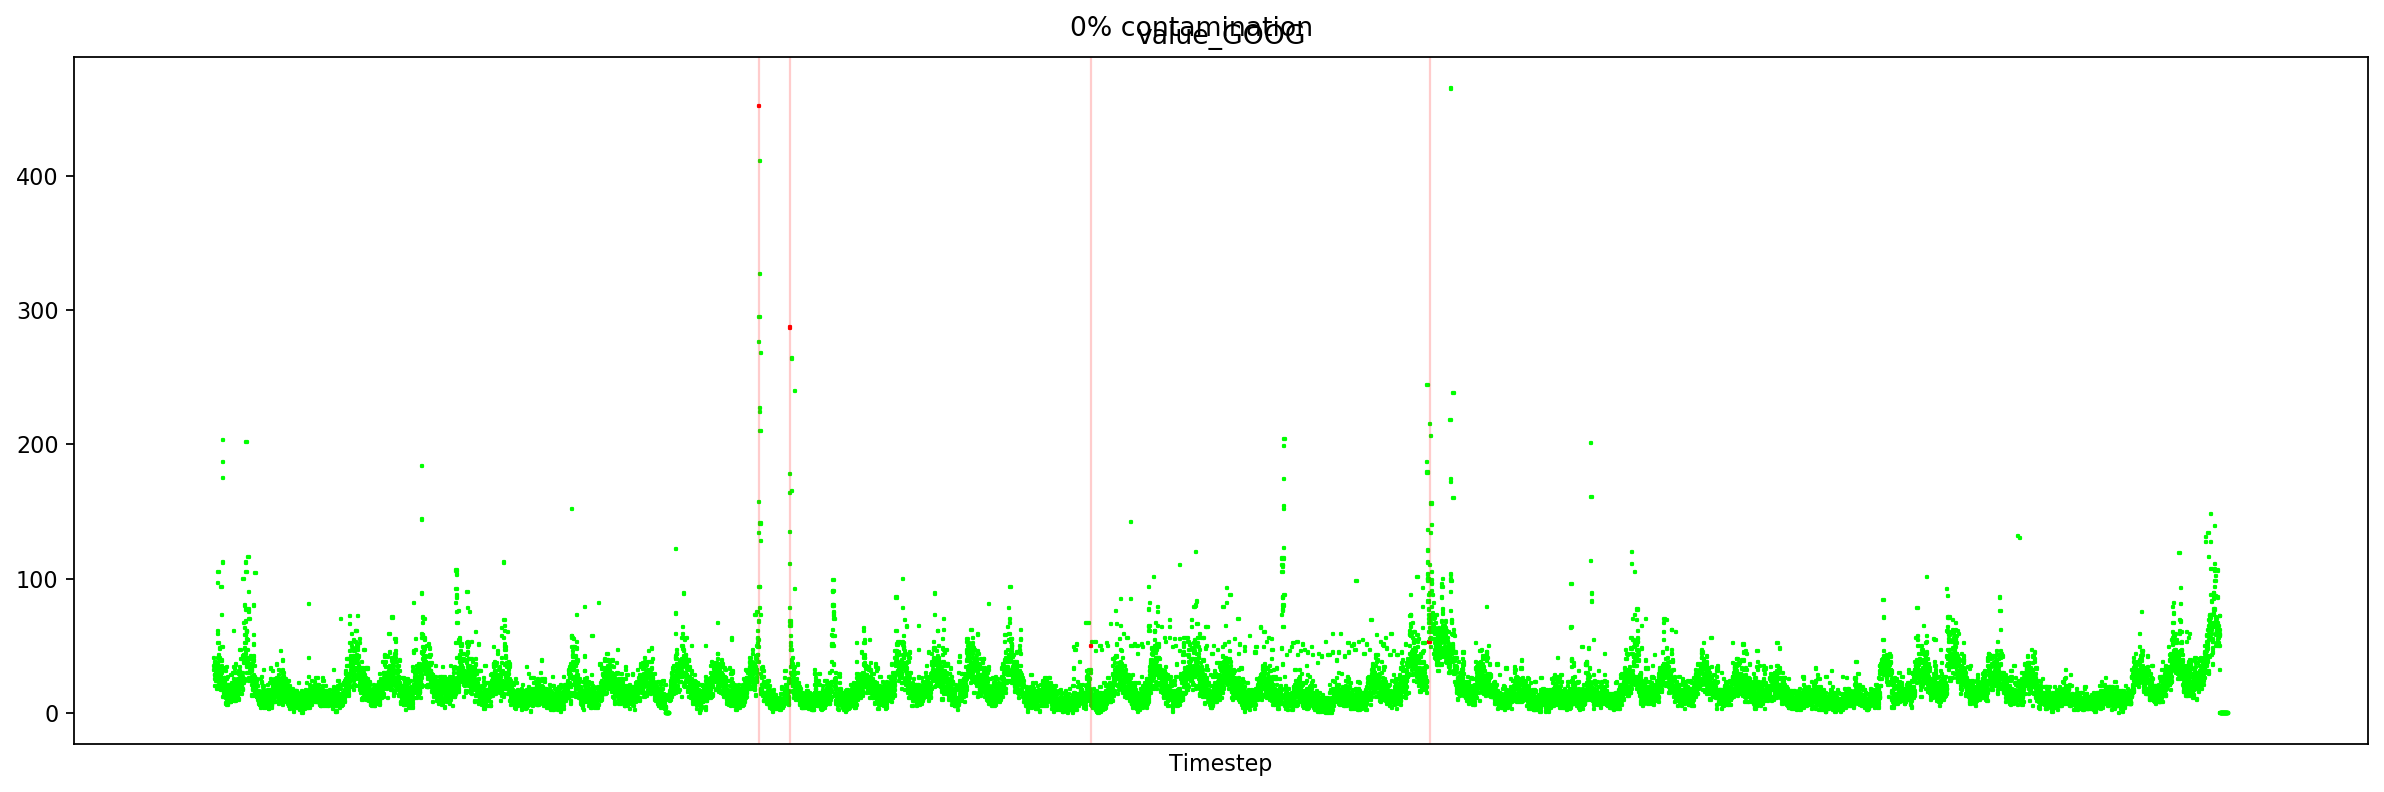

In [6]:
plot_at_contamination(goog_tweets, 0)

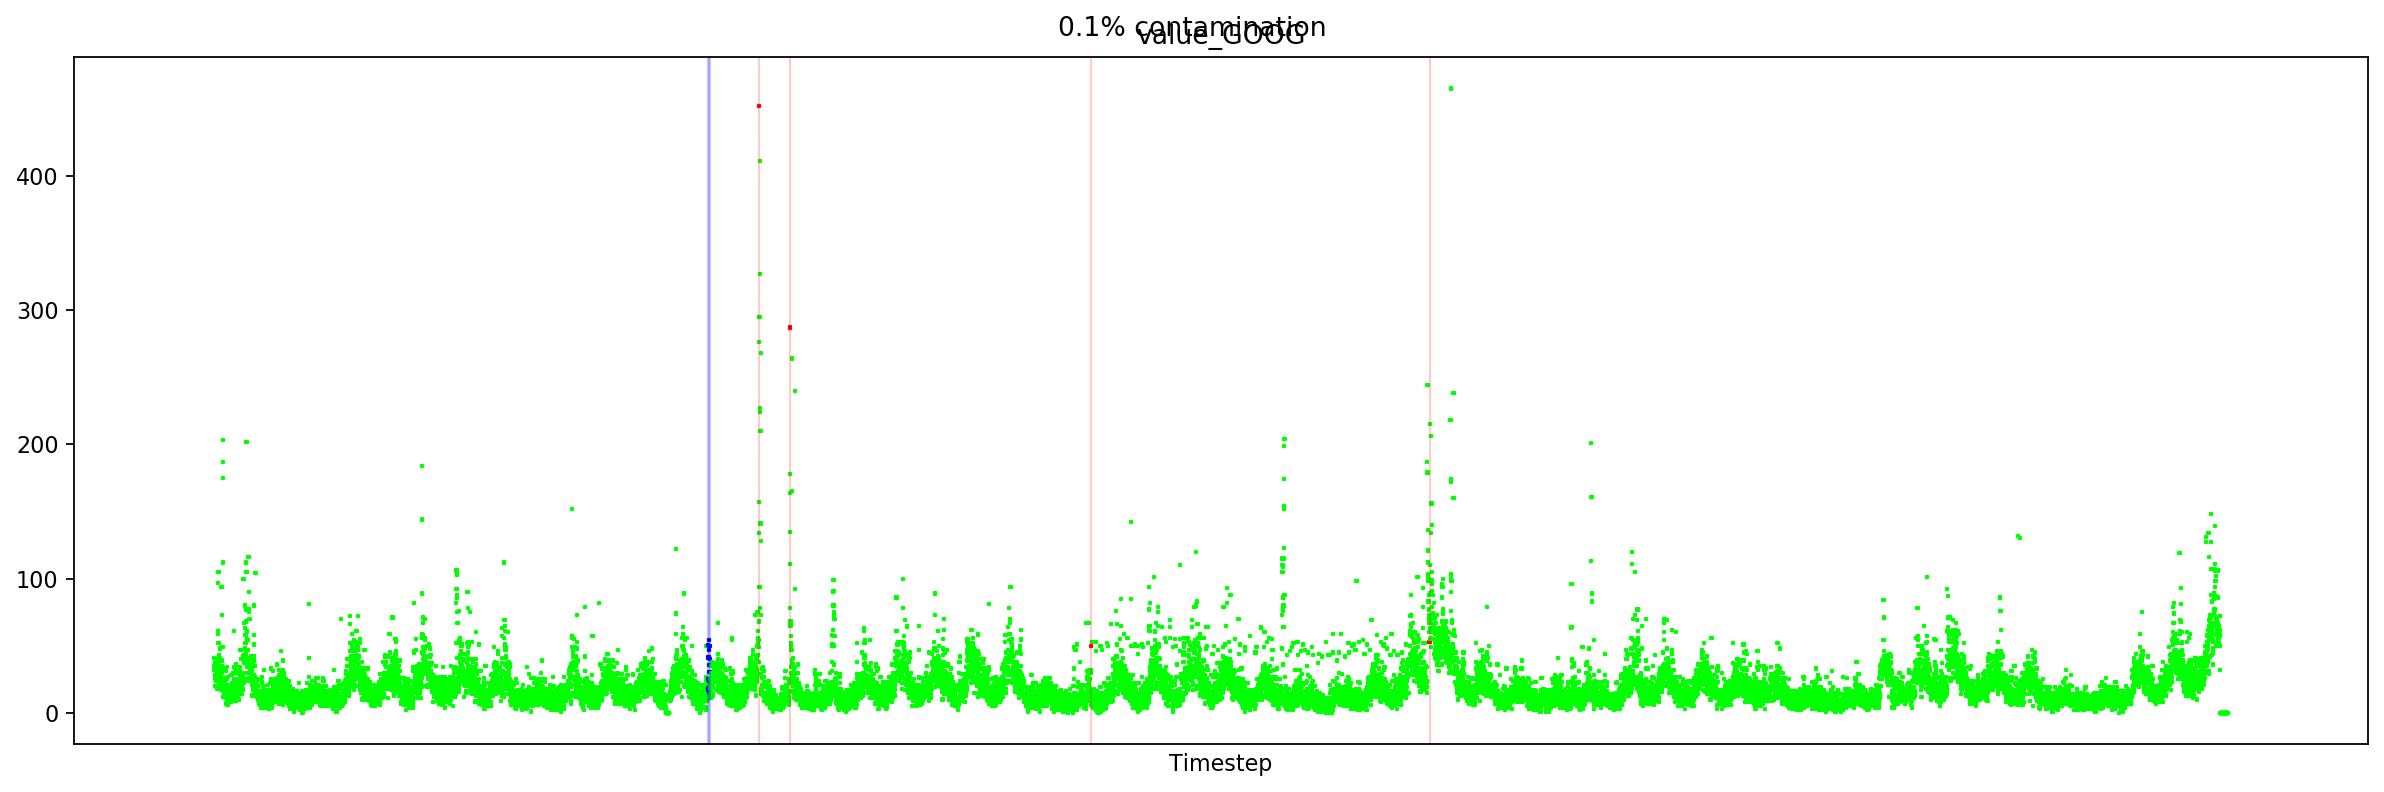

In [7]:
plot_at_contamination(goog_tweets, 0.001)

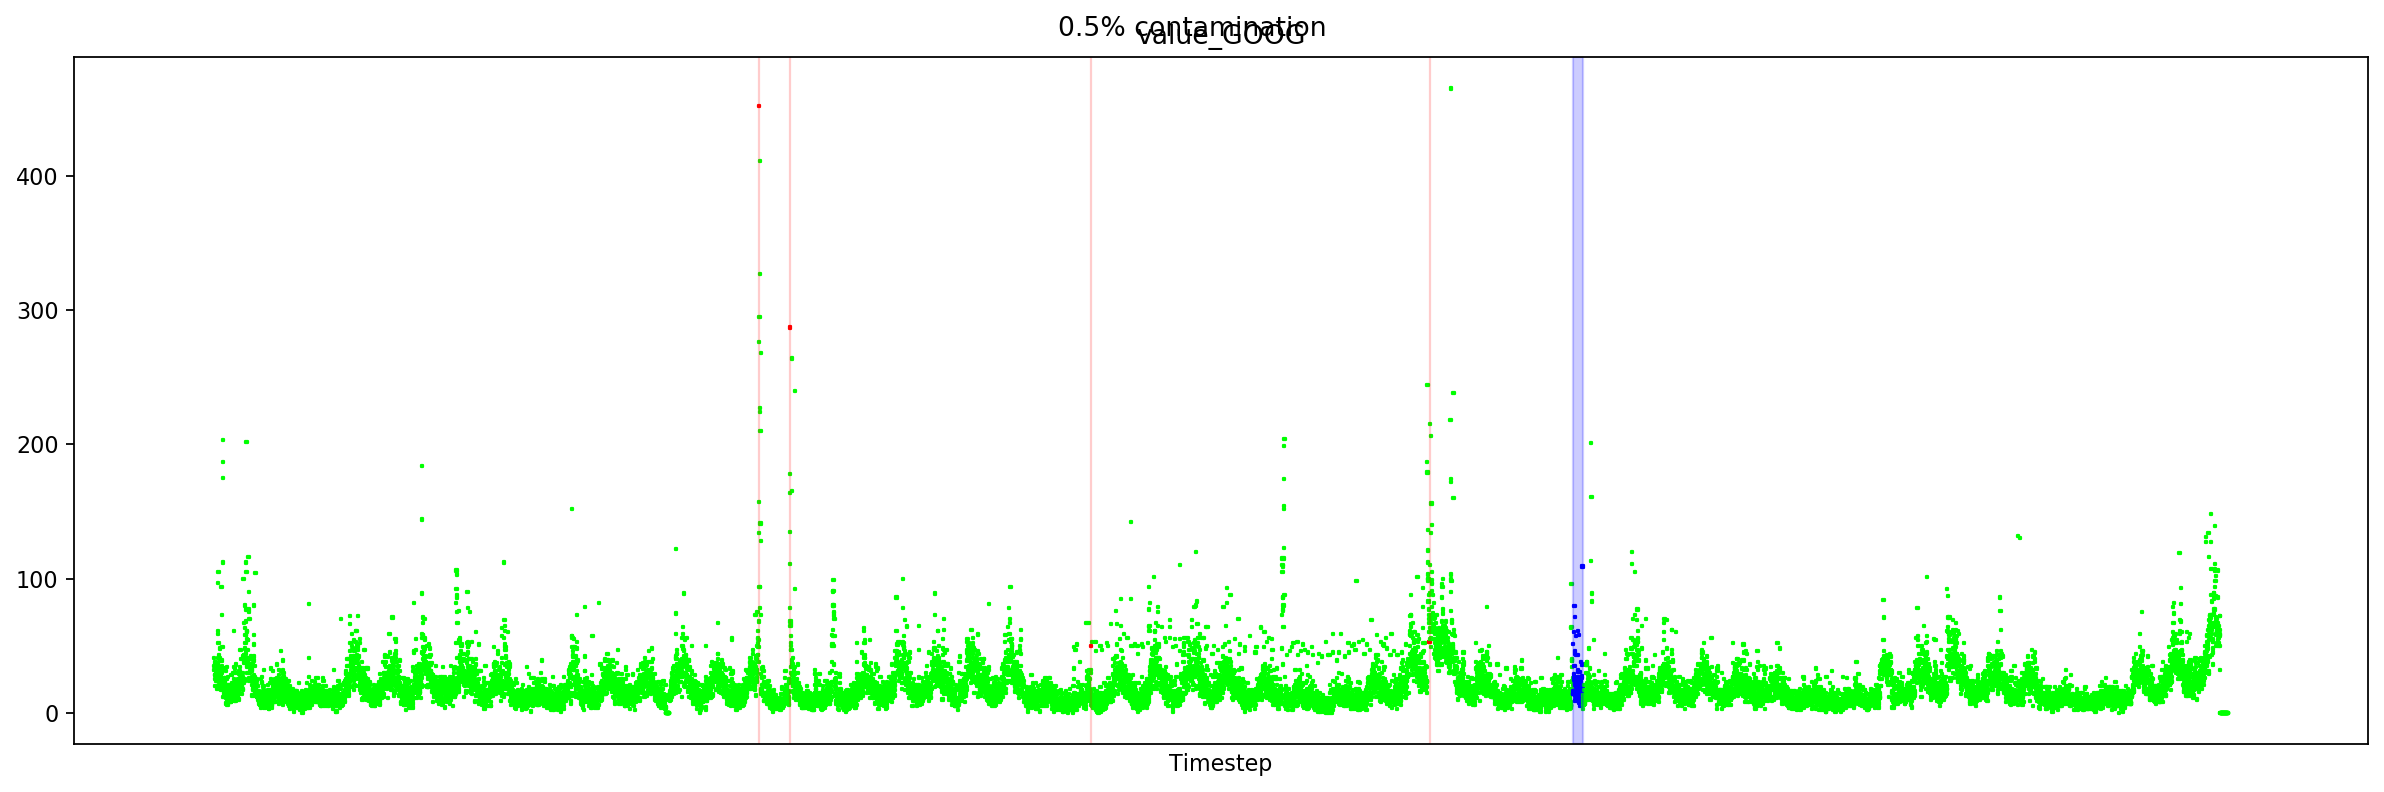

In [8]:
plot_at_contamination(goog_tweets, 0.005)

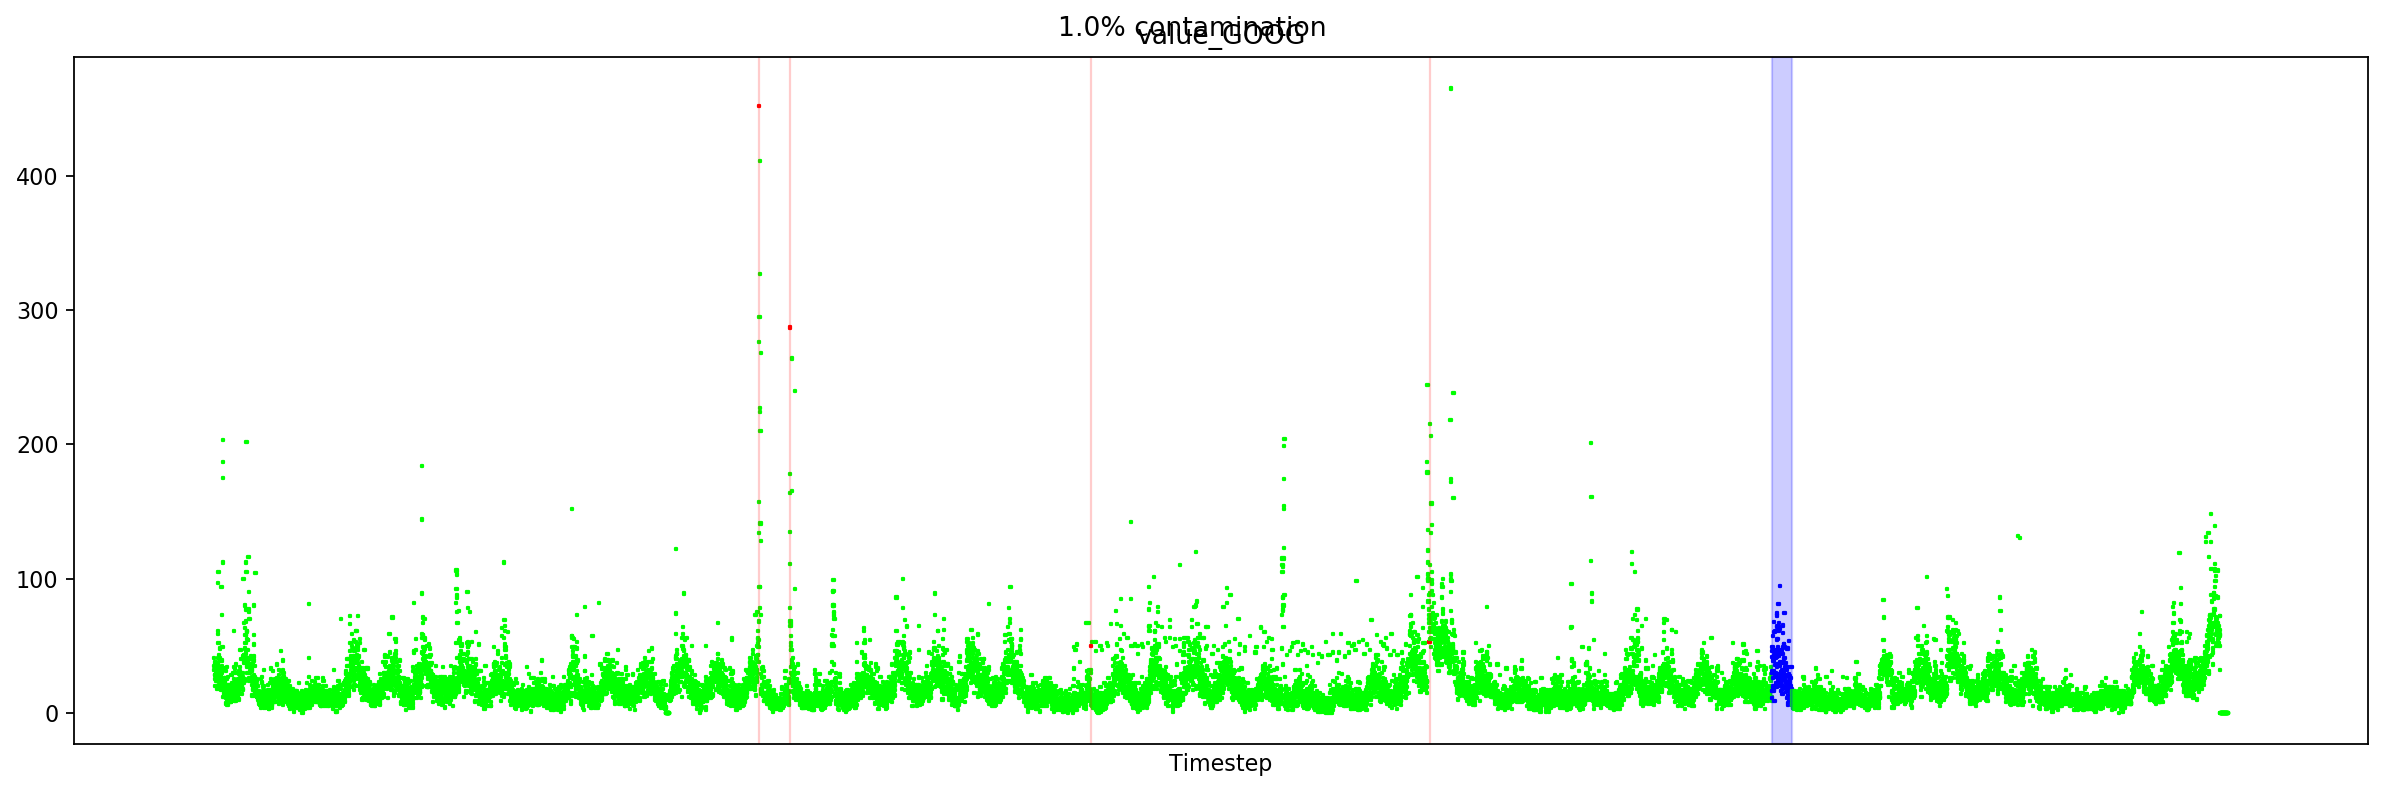

In [9]:
plot_at_contamination(goog_tweets, 0.01)

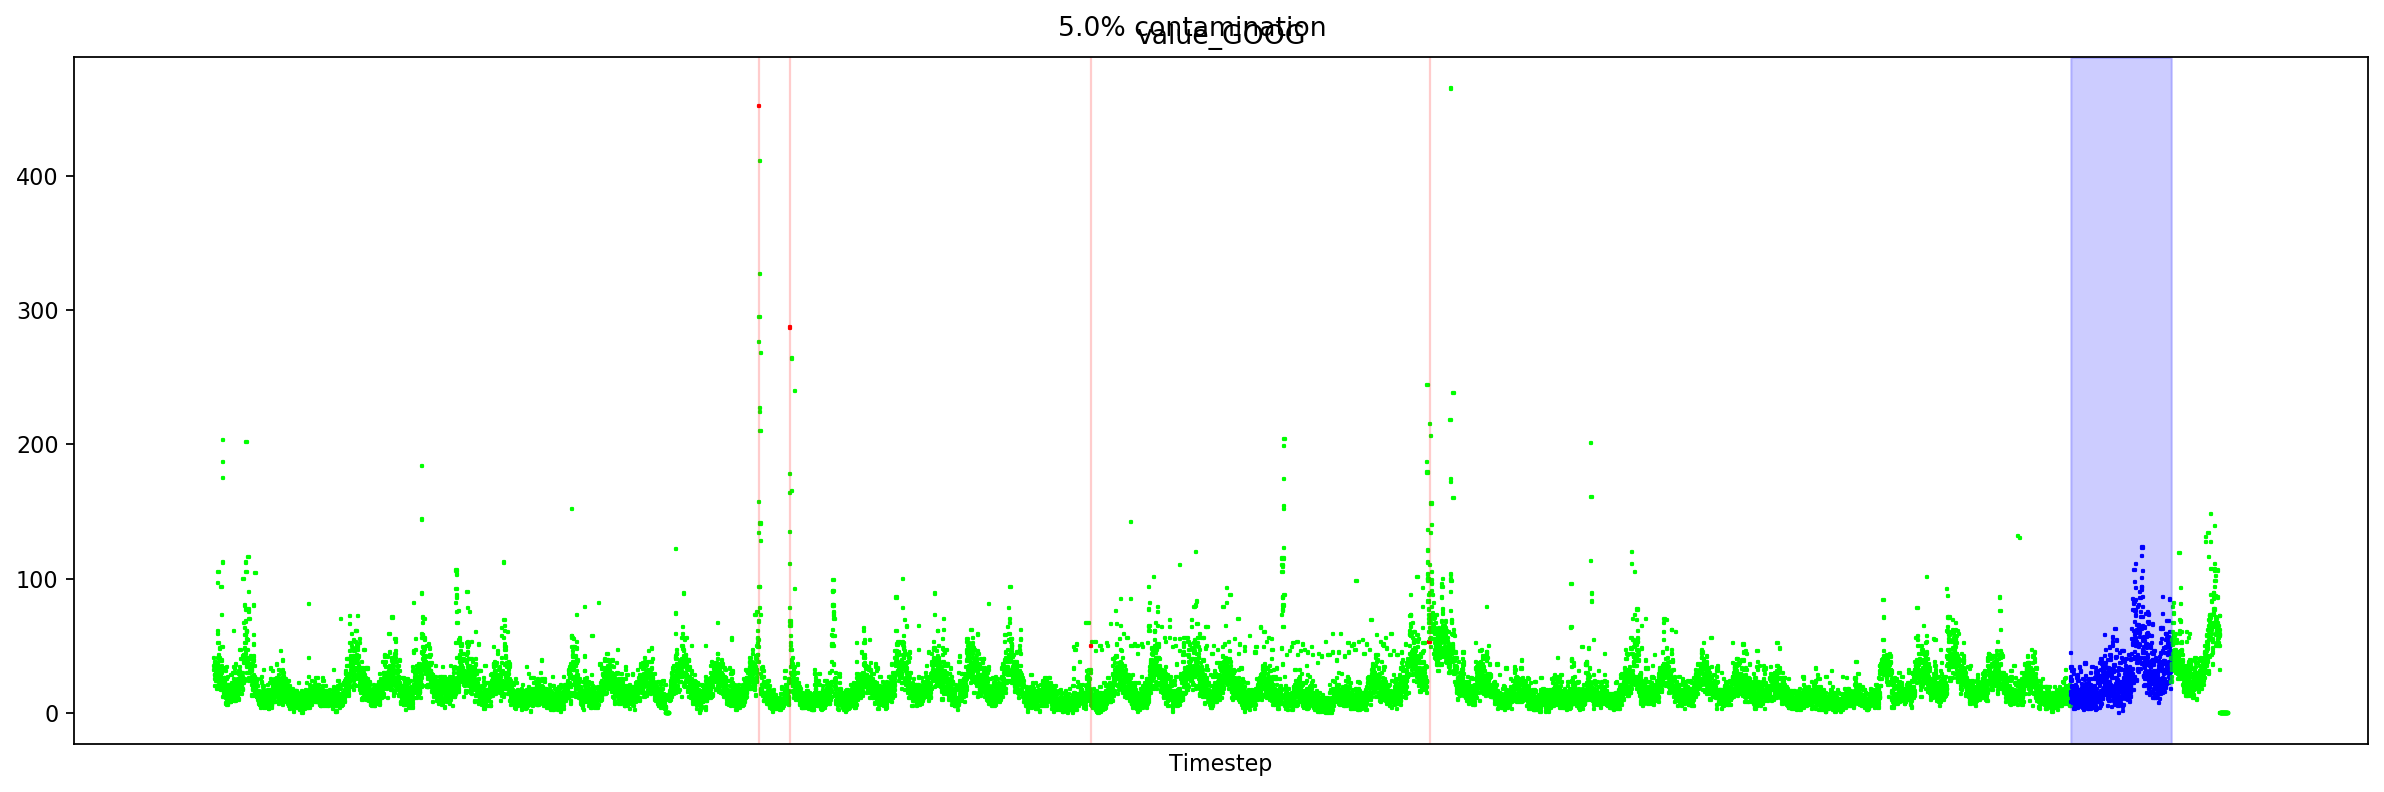

In [10]:
plot_at_contamination(goog_tweets, 0.05)

## Yahoo Series 36

In [11]:
yahoo_36 = extract_series(yahoo_df, "value_36")

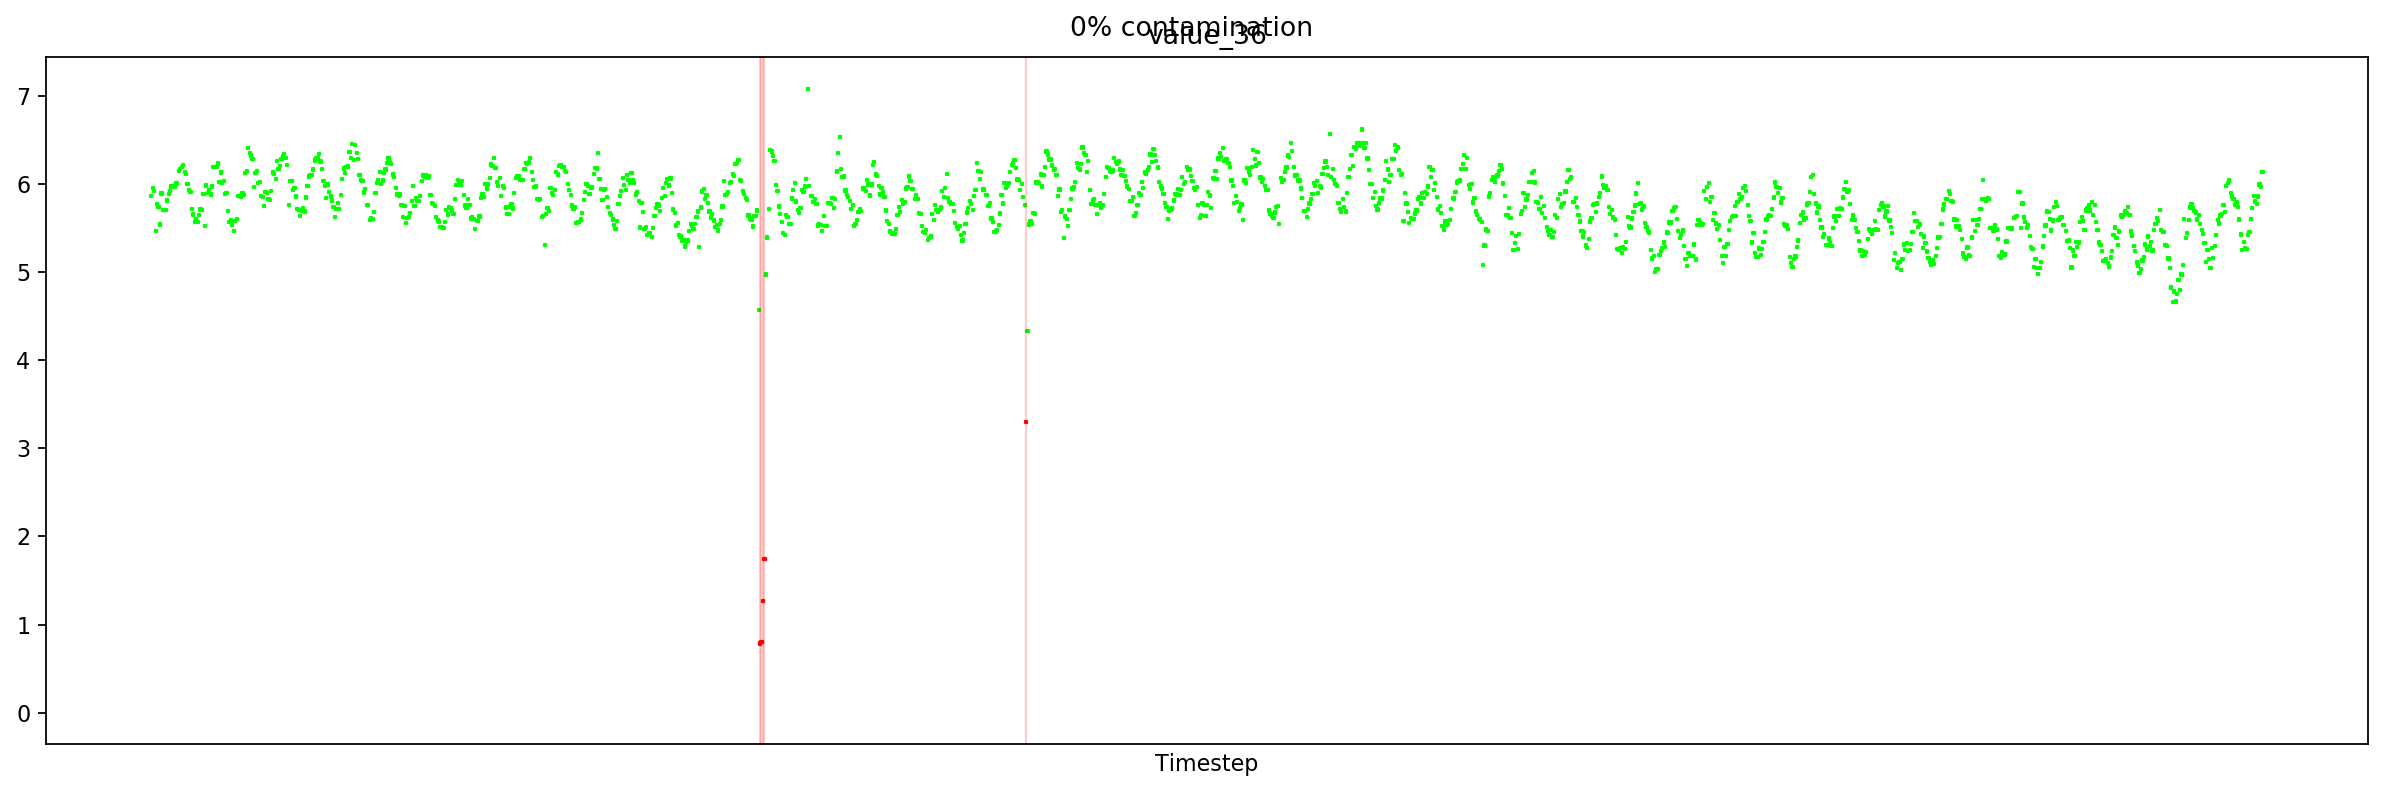

In [12]:
plot_at_contamination(yahoo_36, 0)

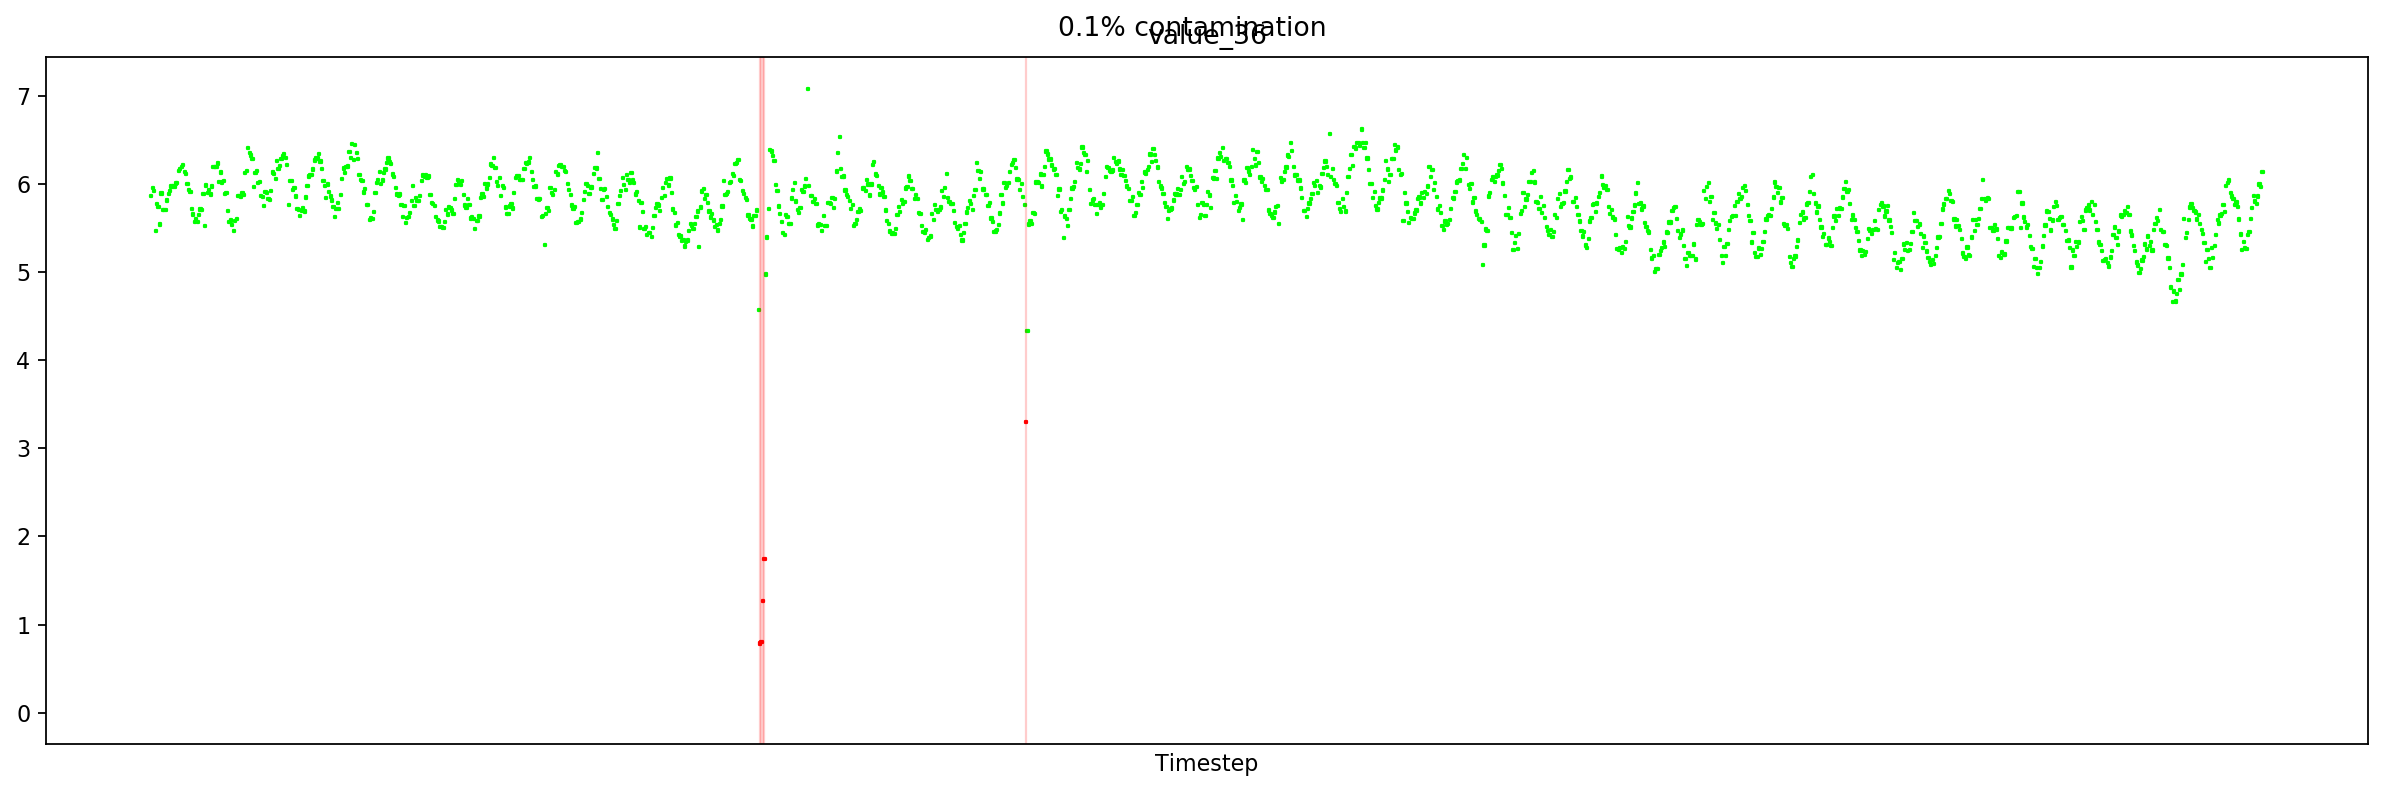

In [13]:
plot_at_contamination(yahoo_36, 0.001)

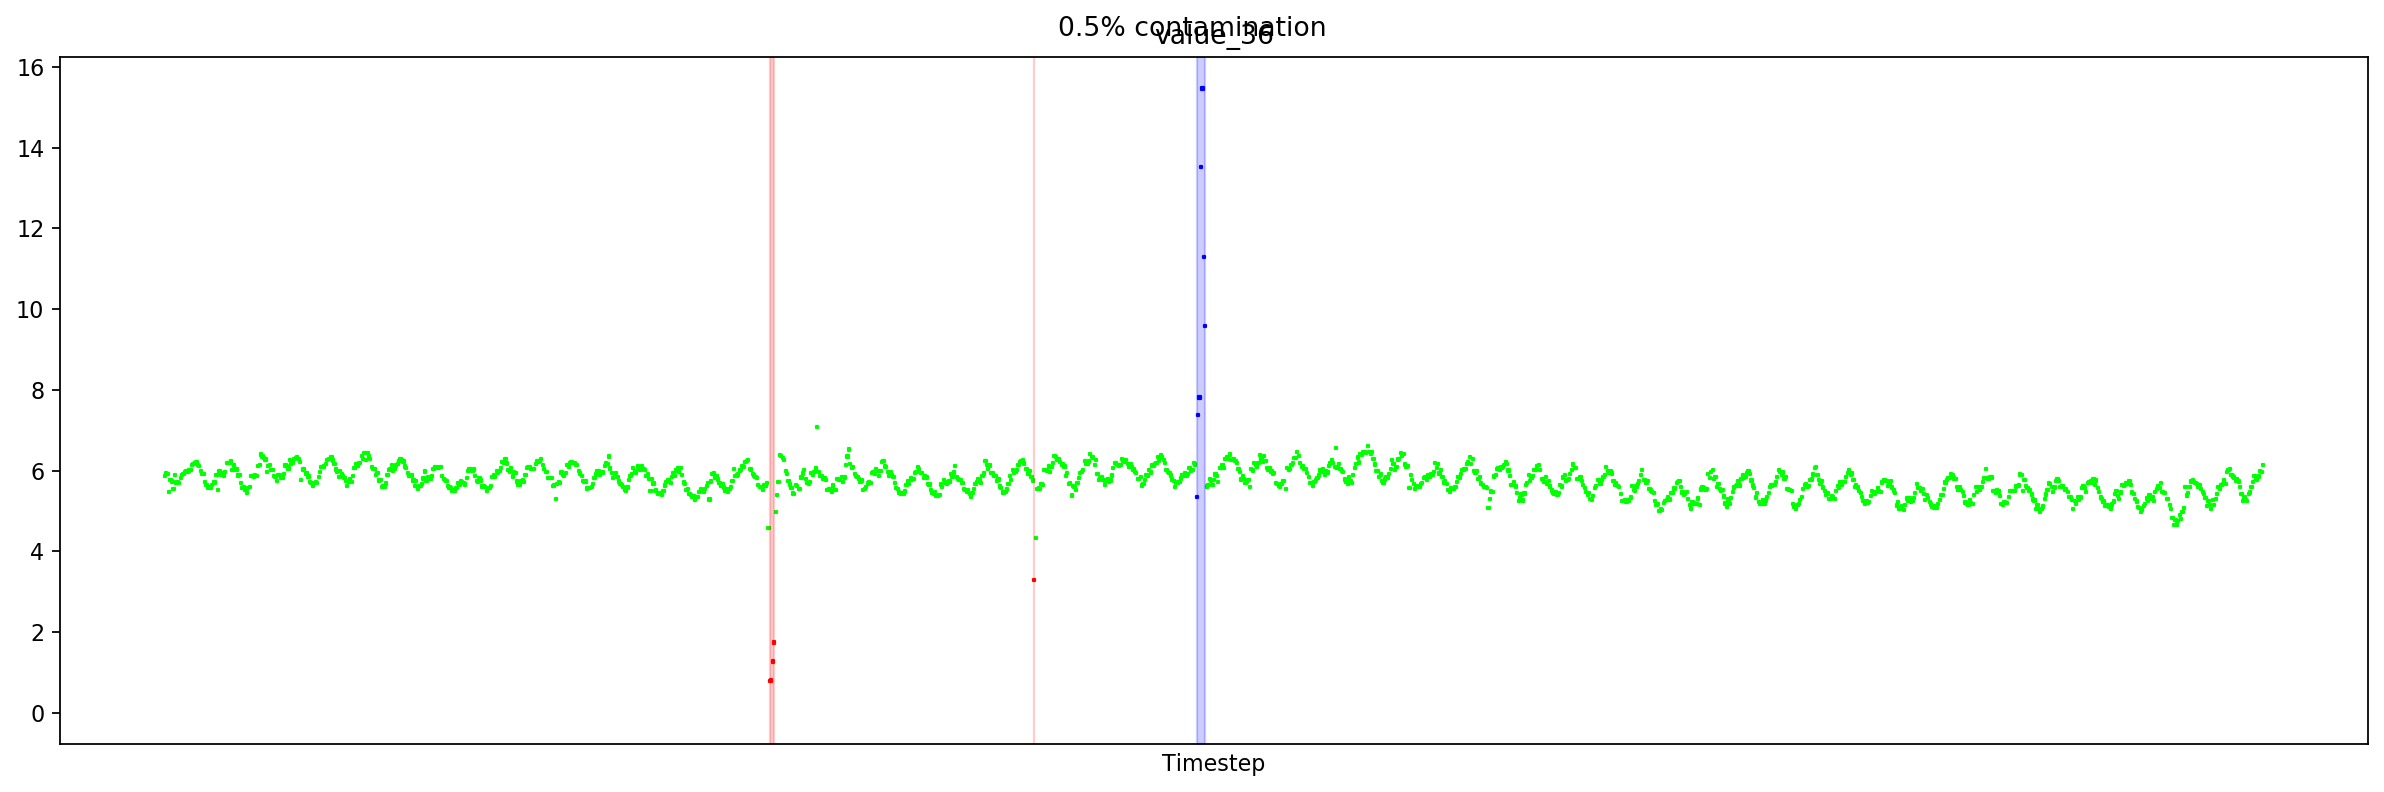

In [14]:
plot_at_contamination(yahoo_36, 0.005)

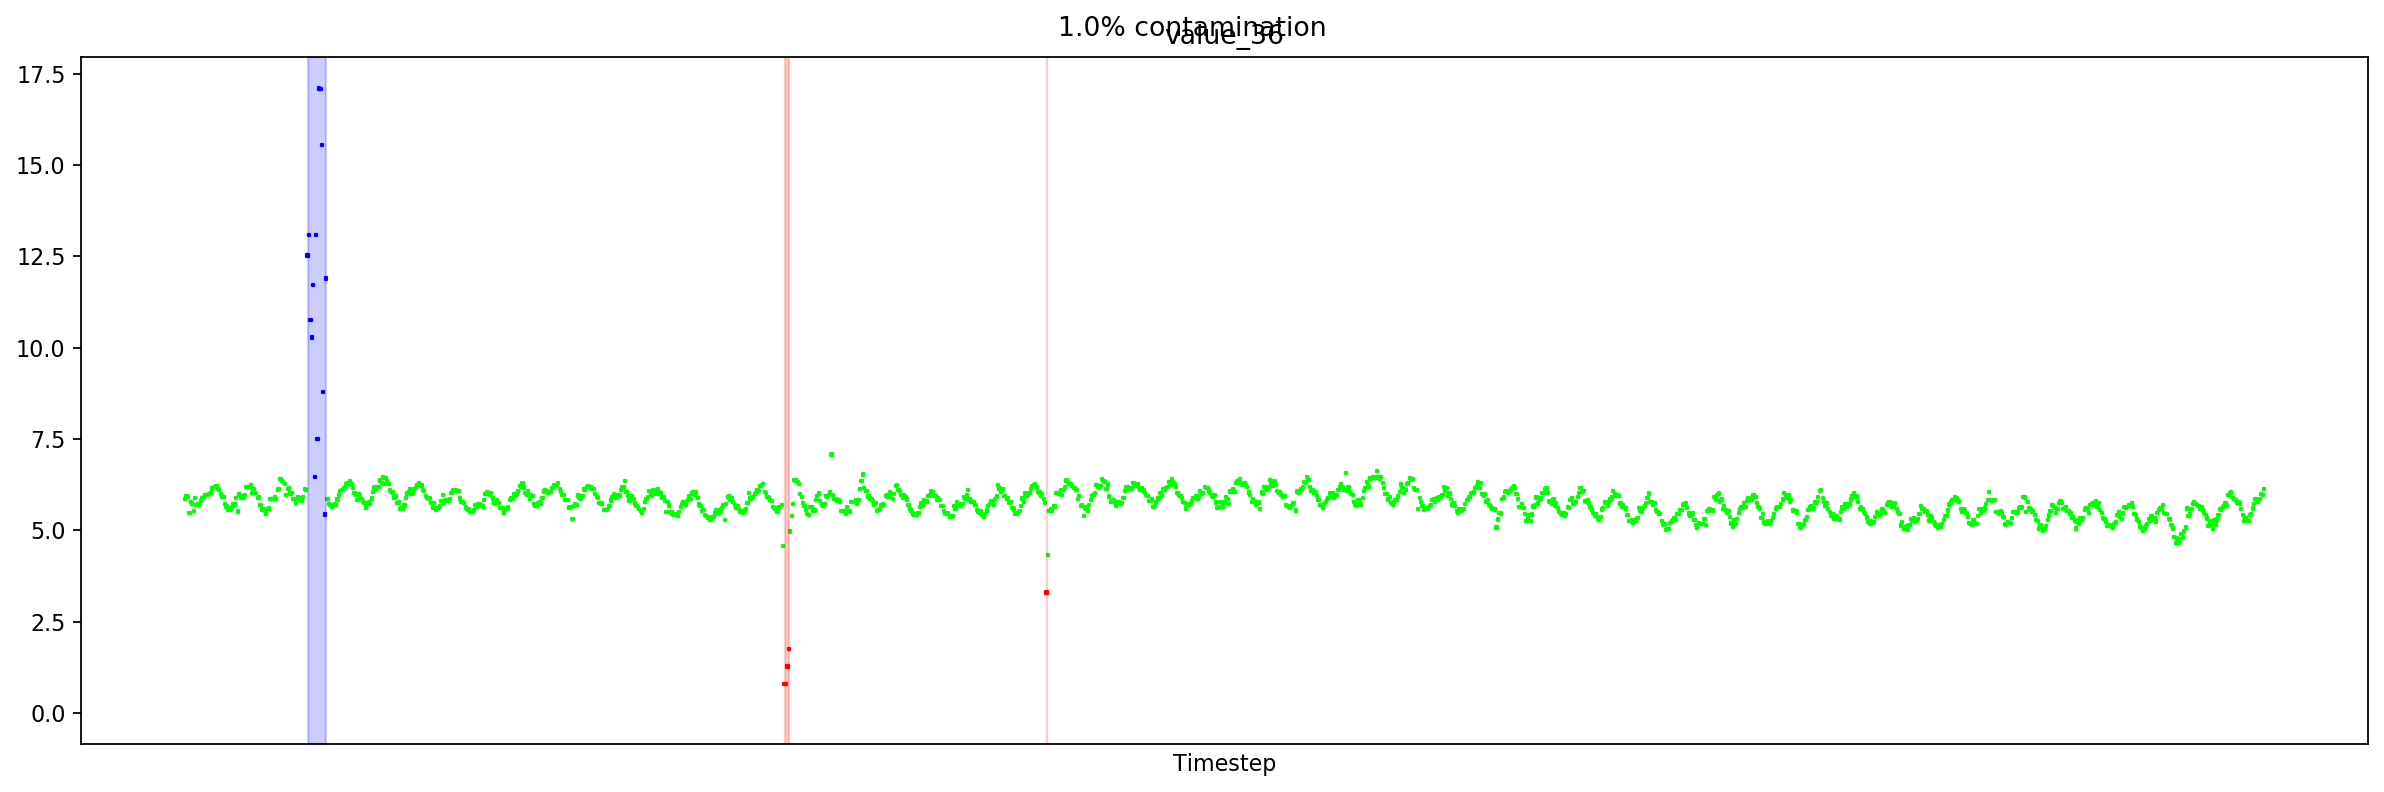

In [15]:
plot_at_contamination(yahoo_36, 0.01)

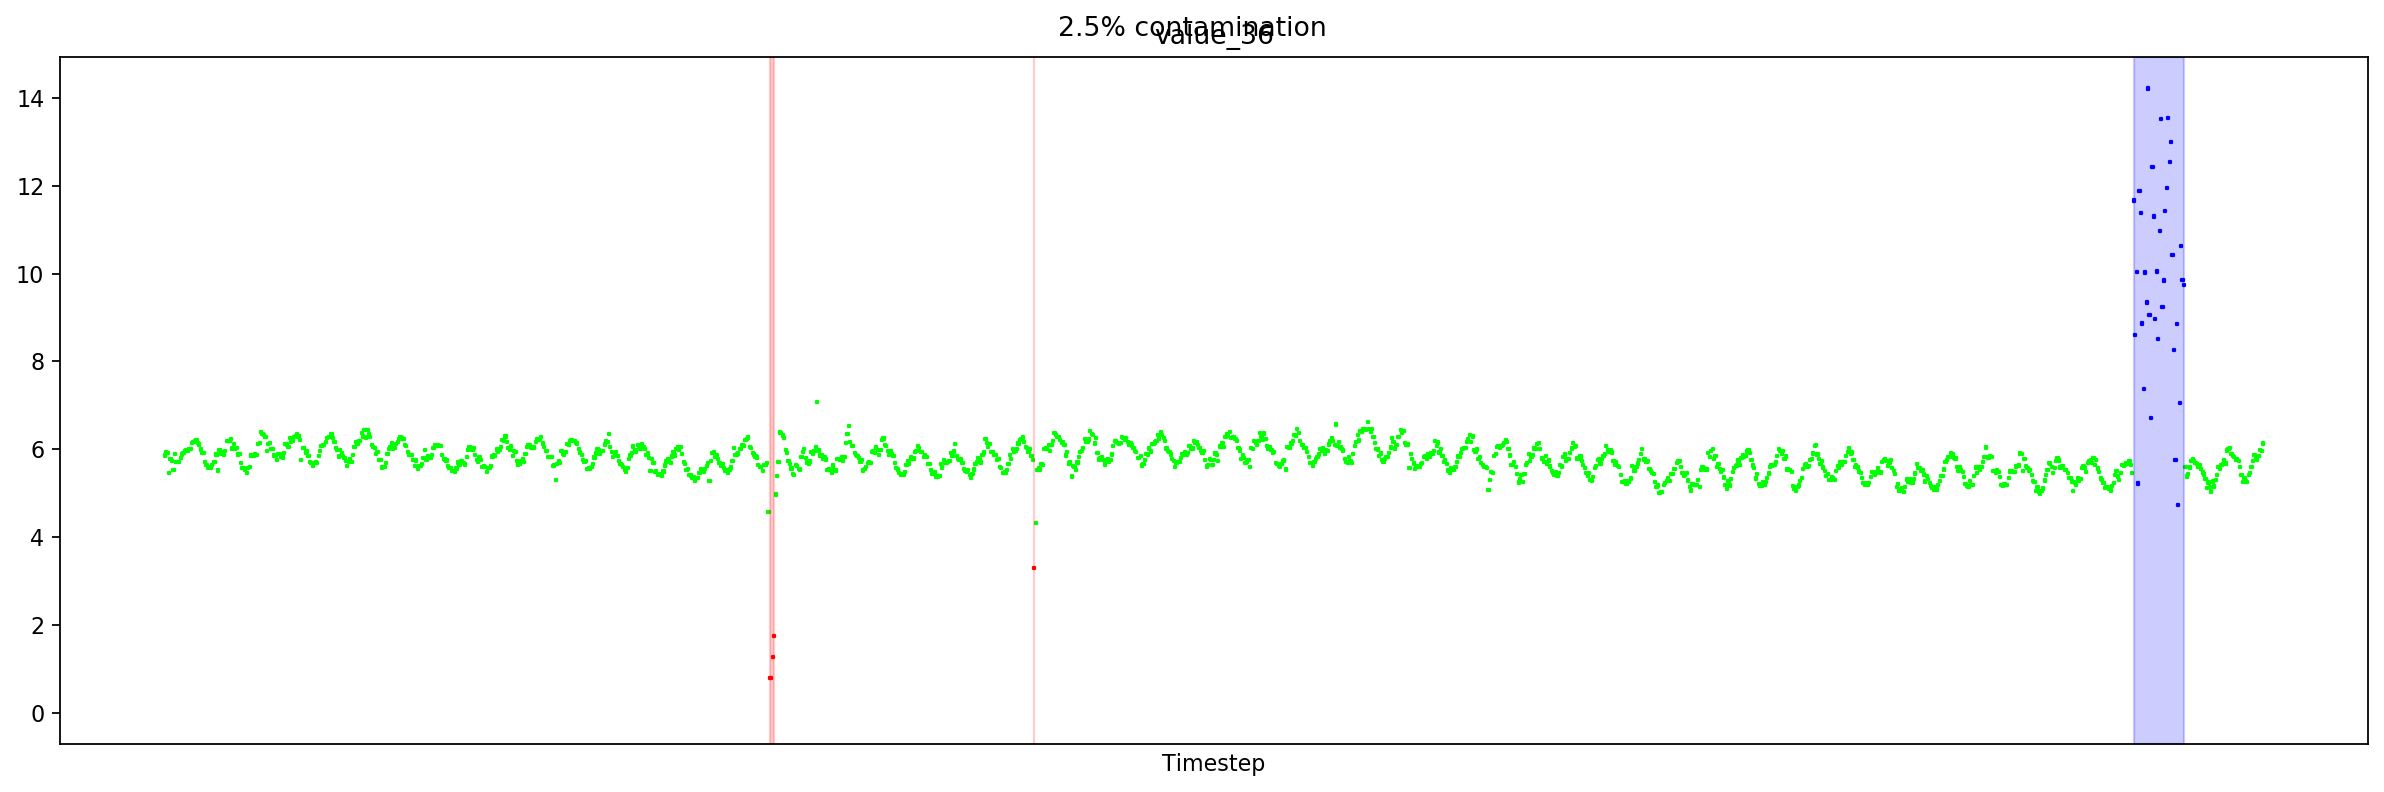

In [16]:
plot_at_contamination(yahoo_36, 0.025)

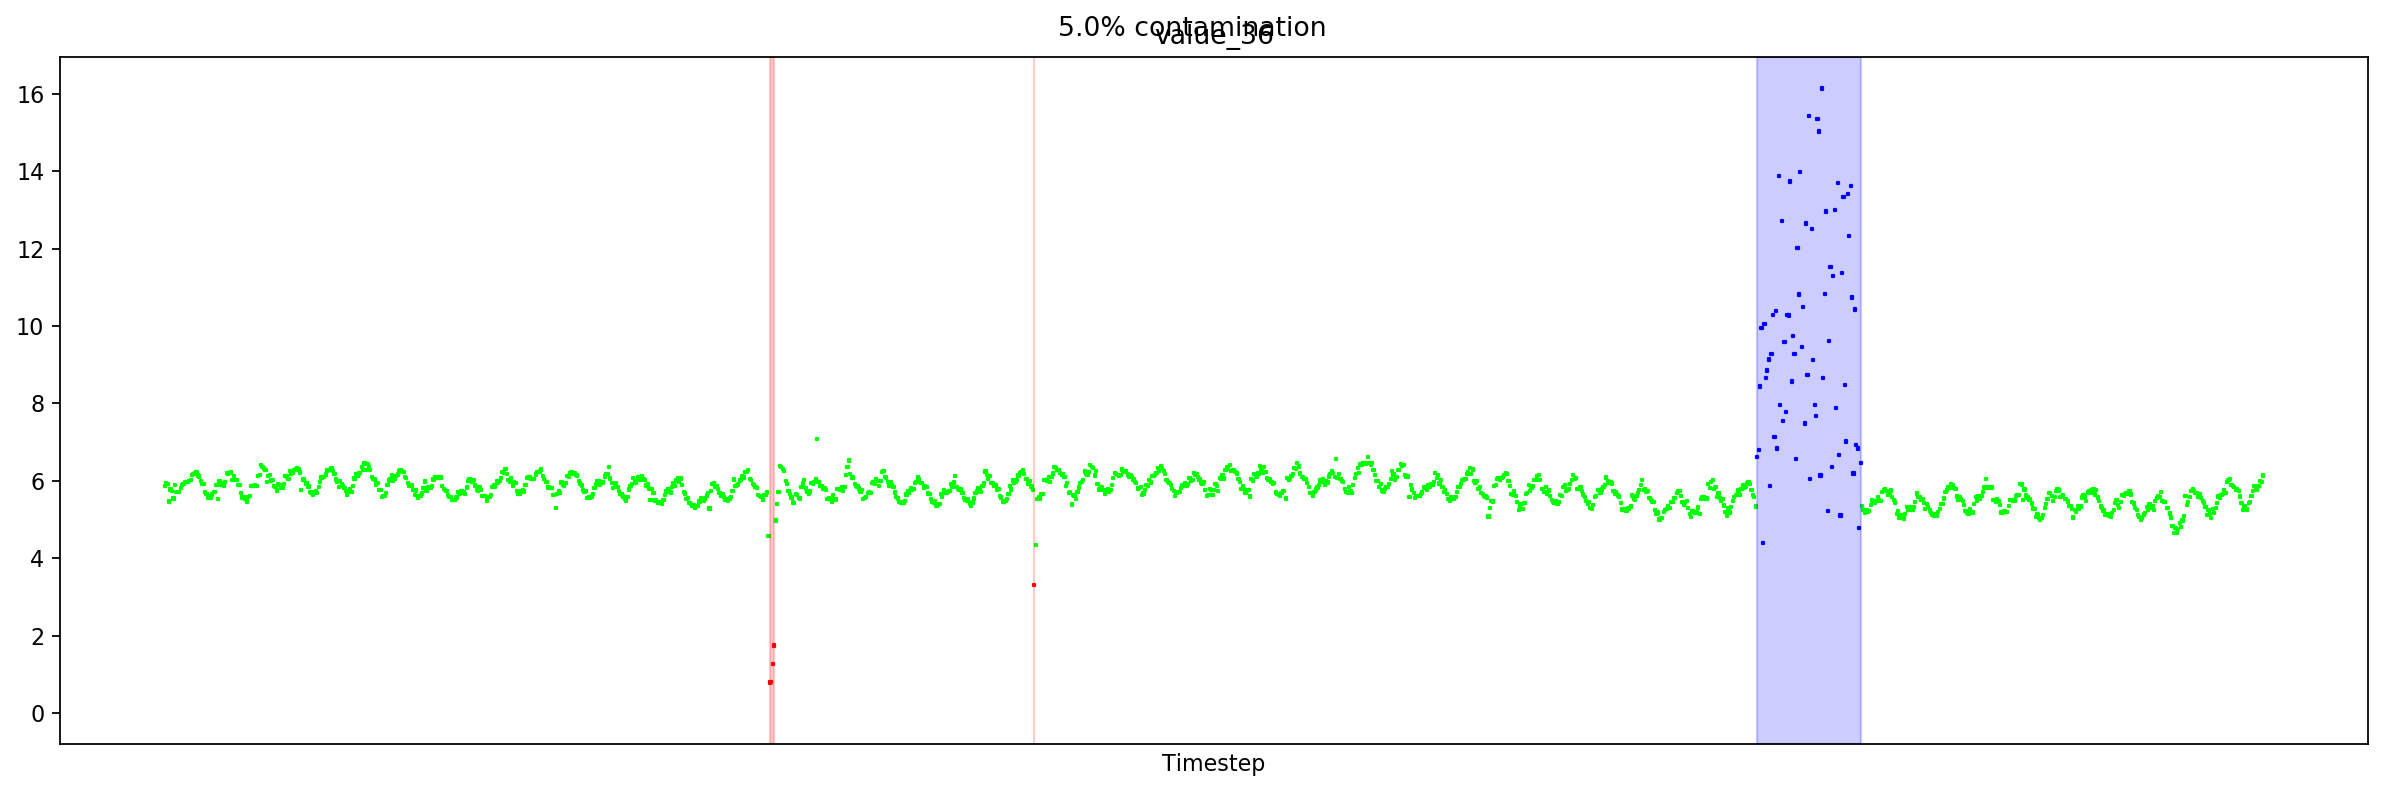

In [17]:
plot_at_contamination(yahoo_36, 0.05)

## Yahoo Series 60

In [18]:
yahoo_60 = extract_series(yahoo_df, "value_60")

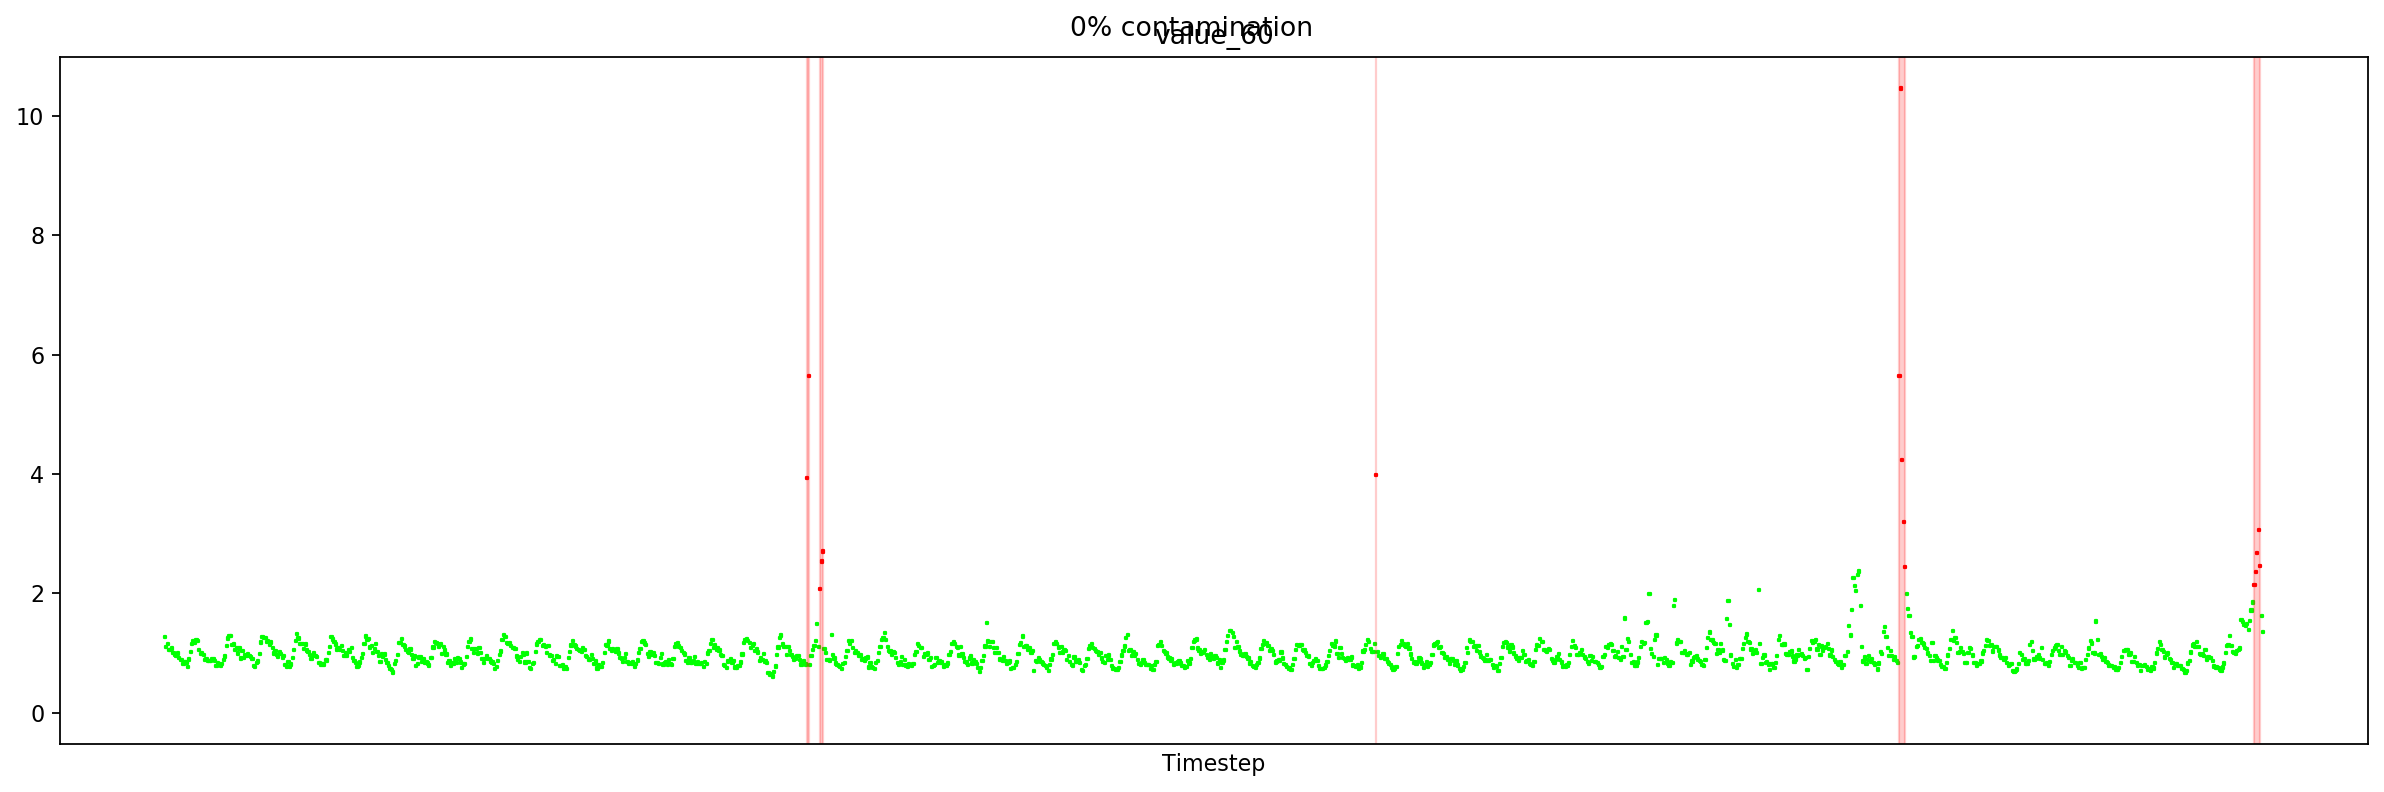

In [19]:
plot_at_contamination(yahoo_60, 0)

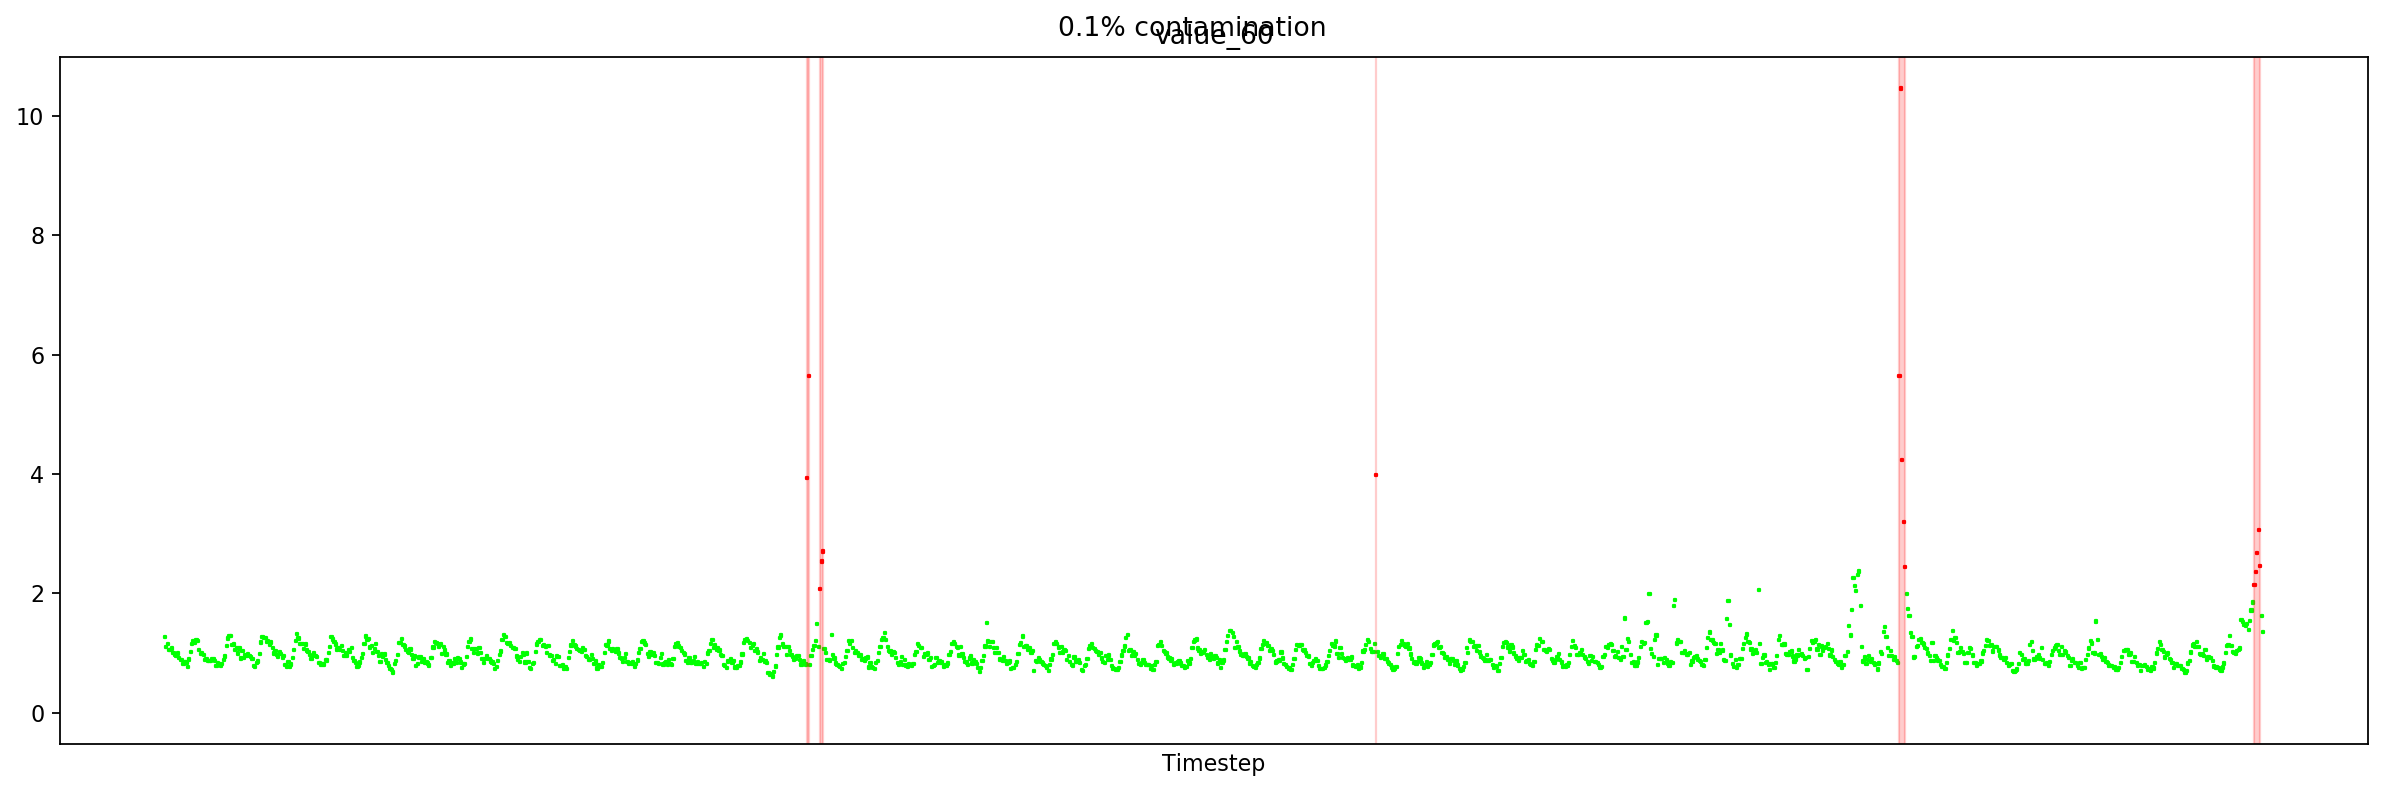

In [20]:
plot_at_contamination(yahoo_60, 0.001)

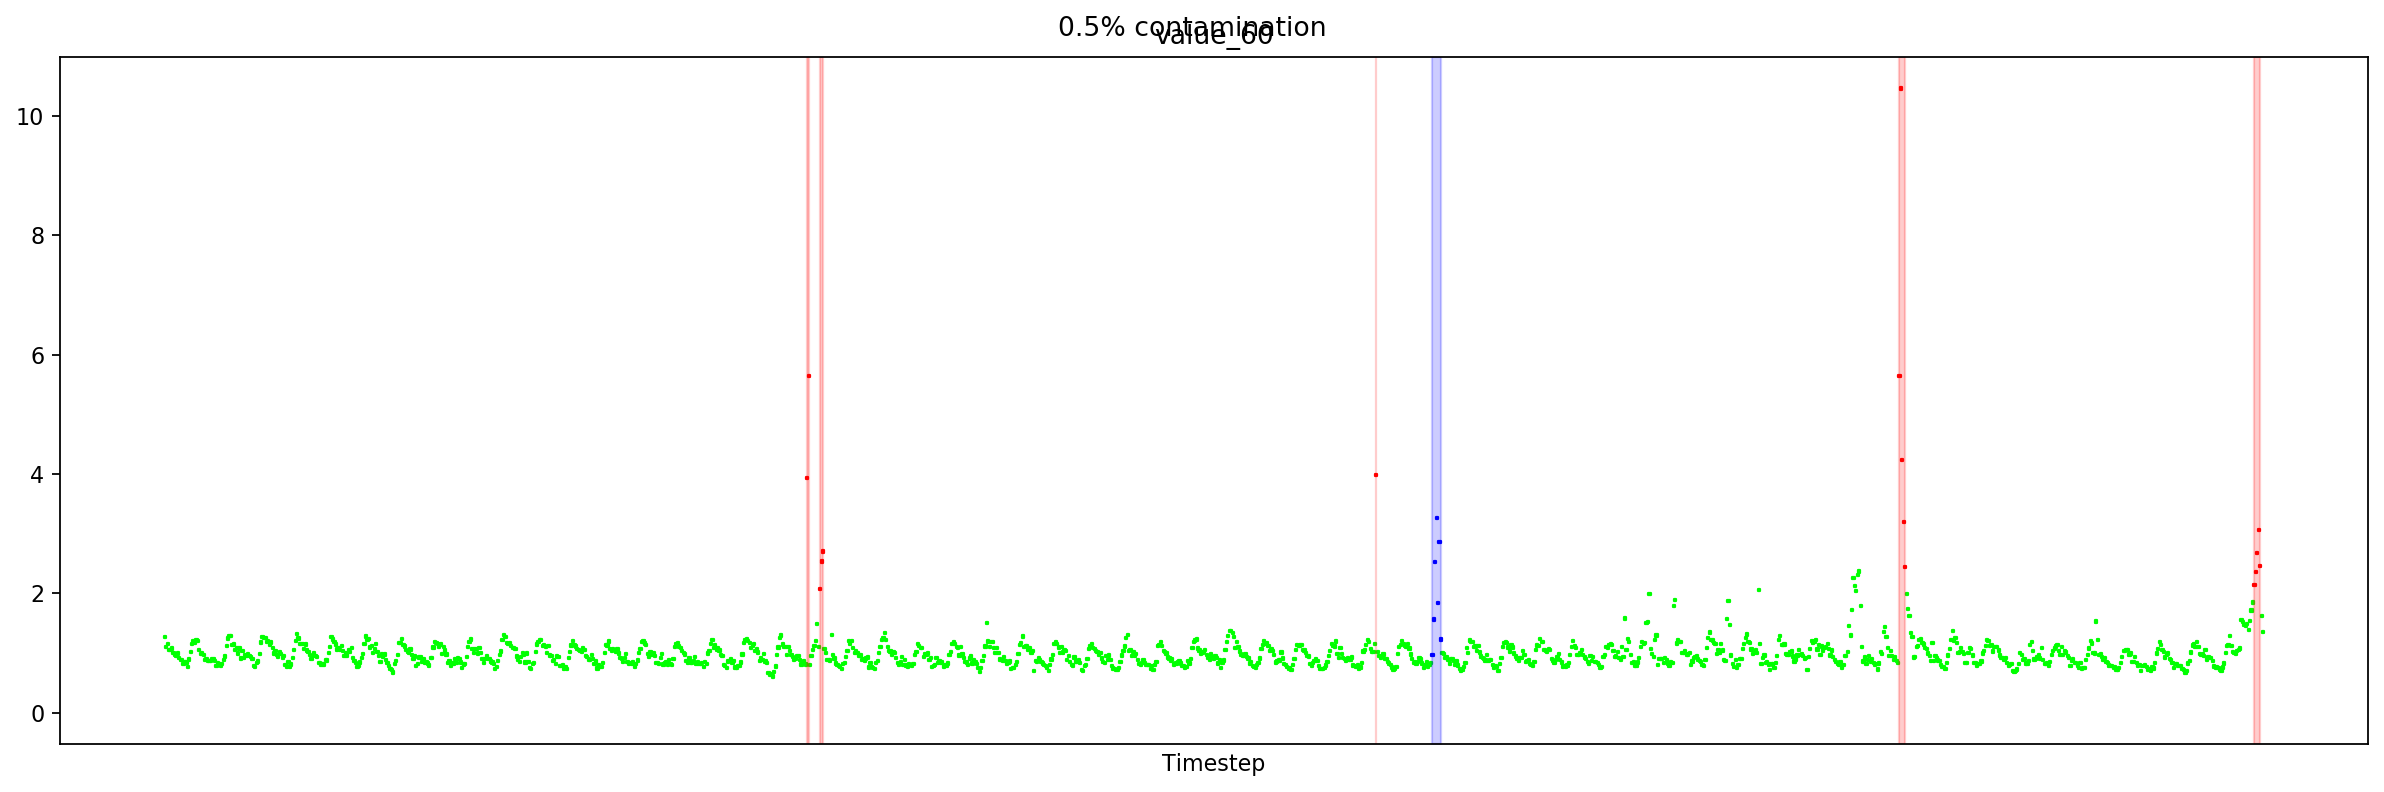

In [21]:
plot_at_contamination(yahoo_60, 0.005)

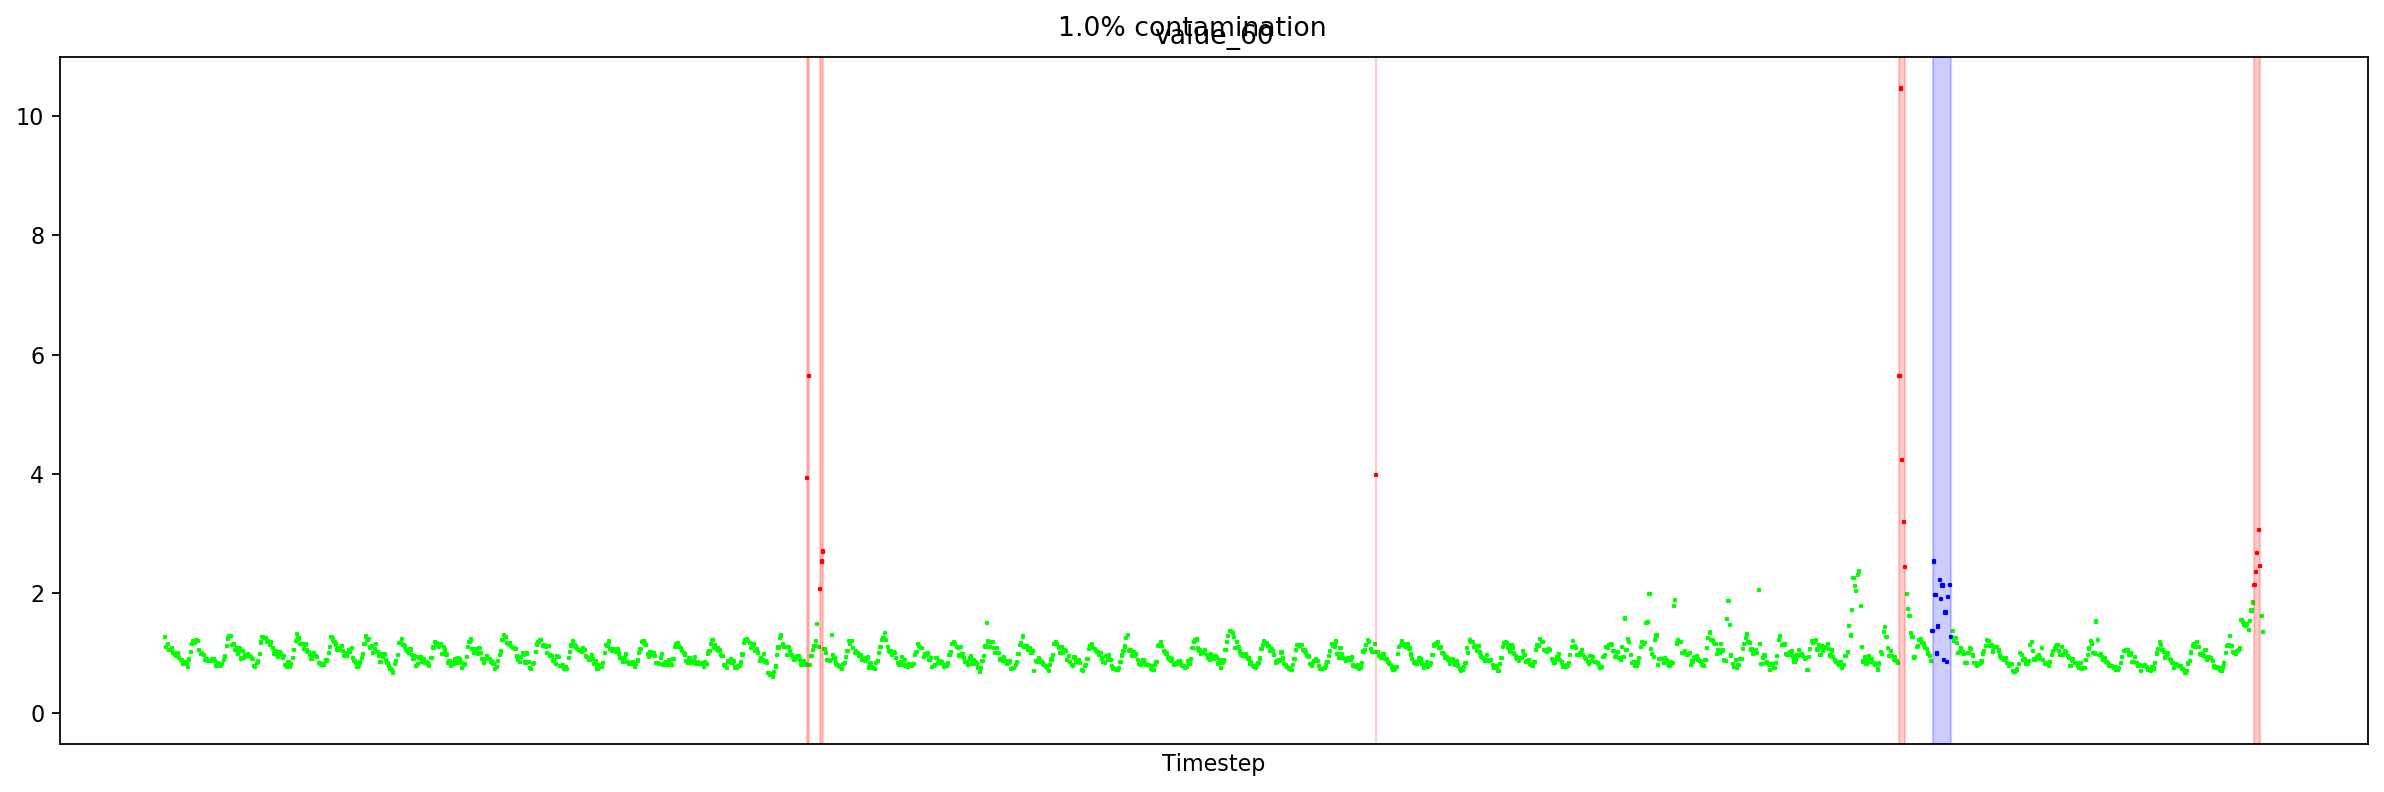

In [22]:
plot_at_contamination(yahoo_60, 0.01)

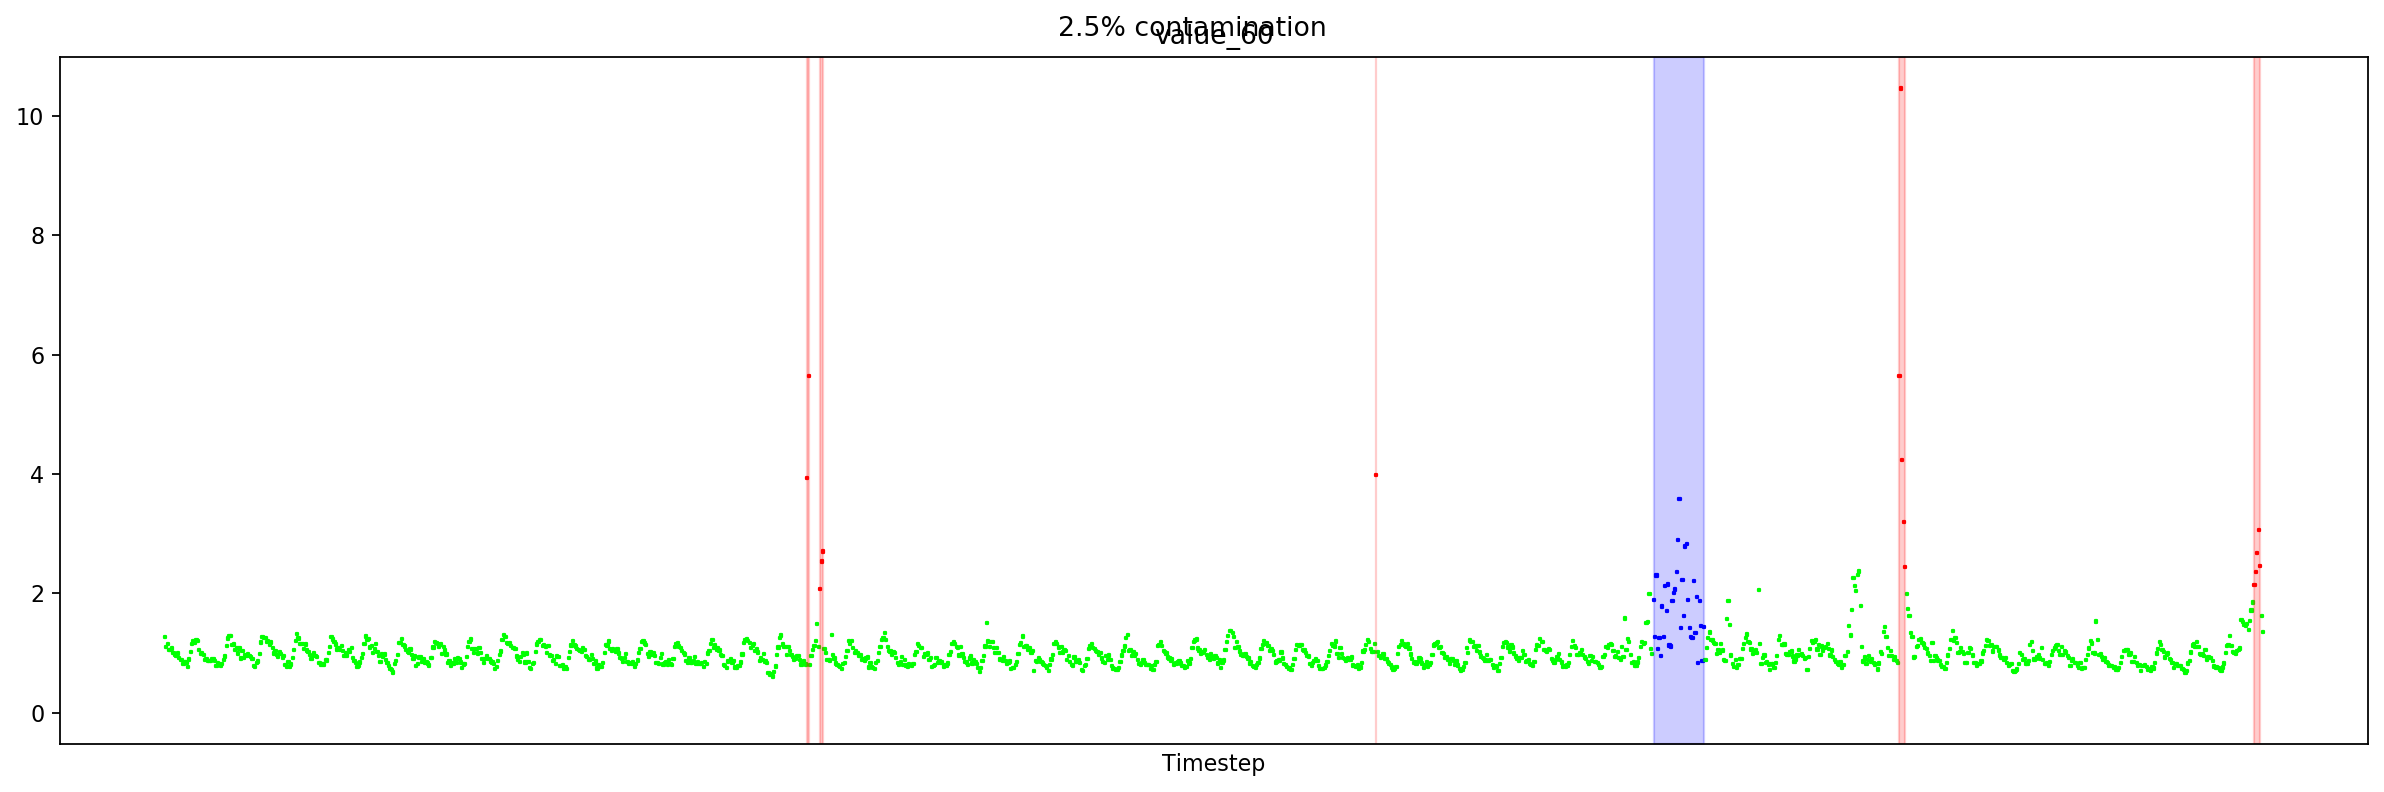

In [23]:
plot_at_contamination(yahoo_60, 0.025)

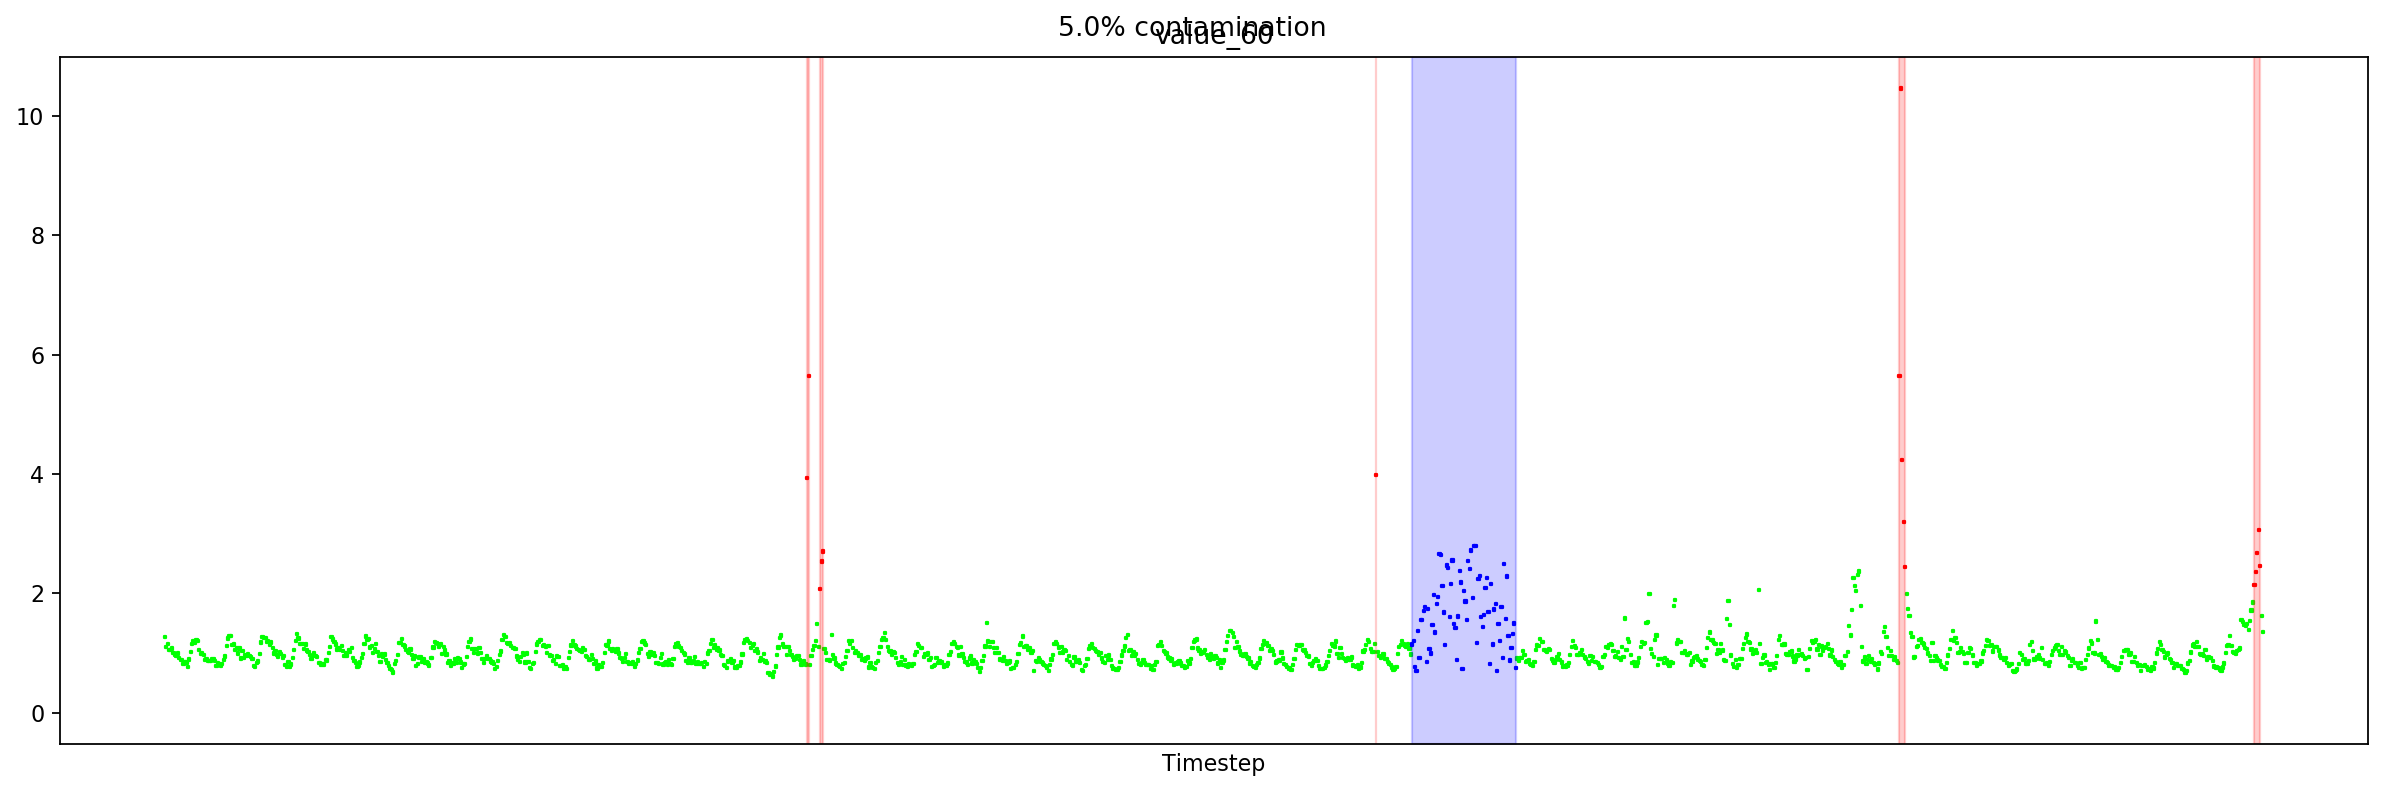

In [24]:
plot_at_contamination(yahoo_60, 0.05)